In [15]:
import kwant

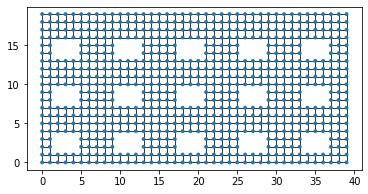

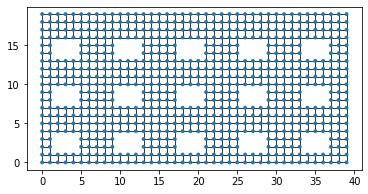

In [14]:
L_values=[]
W_values=[]
a= 1
t = 1
W = 20
L = 40
l_start= 1
w_start=1
l_size=4
w_size=3
l_dist=4
w_dist=3

lat = kwant.lattice.square(a)

sys = kwant.Builder()

# L_hole_begin=range(l_start, L, l_size+l_dist)
# L_hole_end=range(l_start+l_size, L, l_size+l_dist)

# W_hole_begin=range(w_start, W, w_size+w_dist)
# W_hole_end=range(w_start+w_size, W, w_size+w_dist)

# for l1, l2 in zip(L_hole_begin, L_hole_end):
#     L_values.extend(range(l1, l2))

# for w1, w2 in zip(W_hole_begin, W_hole_end):
#     W_values.extend(range(w1, w2))

# coords= list(itertools.product(L_values, W_values))

def square_hole(site):
    x, y = site.pos
    return abs(x-center[0]) < l_size/2 and abs(y-center[1]) < w_size/2

sys[(lat(i, j) for i in range(L) for j in range(W))] = 4 * t
sys[lat.neighbors()] = -t

for i in range(int(L/(l_size+l_dist))):
    for j in range(int(W/(w_size+w_dist))):
        center = (l_start + i*l_dist + (i+1/2)*l_size, w_start + j*w_dist + (j+1/2)*w_size)
        for site in filter(square_hole, list(sys.sites())):
            del sys[site]

sys = sys.finalized()

kwant.plot(sys)


